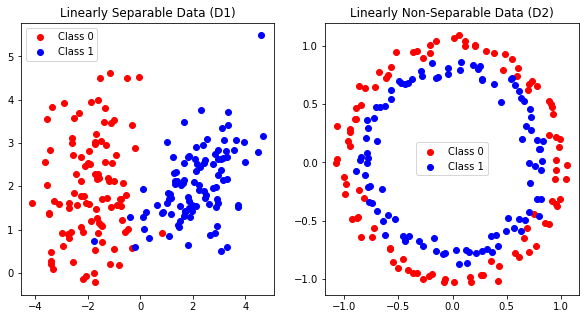

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification, make_circles

# Generate D1: Linearly separable data
X1, y1 = make_classification(n_samples=200, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, class_sep=2.0, random_state=42)

# Generate D2: Linearly non-separable data
X2, y2 = make_circles(n_samples=200, noise=0.05, random_state=42)
#X2 = np.dot(X2, [[0.6, -0.6], [0.6, 0.6]])

# Plotting D1
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.scatter(X1[y1 == 0][:, 0], X1[y1 == 0][:, 1], color='red', label='Class 0')
plt.scatter(X1[y1 == 1][:, 0], X1[y1 == 1][:, 1], color='blue', label='Class 1')
plt.title('Linearly Separable Data (D1)')
plt.legend()

# Plotting D2
plt.subplot(1, 2, 2)
plt.scatter(X2[y2 == 0][:, 0], X2[y2 == 0][:, 1], color='red', label='Class 0')
plt.scatter(X2[y2 == 1][:, 0], X2[y2 == 1][:, 1], color='blue', label='Class 1')
plt.title('Linearly Non-Separable Data (D2)')
plt.legend()

plt.show()


In [29]:
from sklearn.model_selection import train_test_split

# Split D1 into training and test sets
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.1, stratify=y1, random_state=42)

# Split D2 into training and test sets
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.1, stratify=y2, random_state=42)

# Extracting T1 and T2
T1 = (X1_test, y1_test)
T2 = (X2_test, y2_test)


In [30]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Train Hard-Margin SVM on D1
svm_hard = SVC(kernel='linear', C=1e10)
svm_hard.fit(X1_train, y1_train)

# Predict on T1
y1_pred = svm_hard.predict(X1_test)
accuracy_t1 = accuracy_score(y1_test, y1_pred)

print(f'Hard-Margin SVM Accuracy on T1: {accuracy_t1}')


Hard-Margin SVM Accuracy on T1: 1.0


In [31]:
# Train Soft-Margin SVM on D2
svm_soft = SVC(kernel='linear', C=1.0)
svm_soft.fit(X2_train, y2_train)

# Predict on T2
y2_pred = svm_soft.predict(X2_test)
accuracy_t2 = accuracy_score(y2_test, y2_pred)

print(f'Soft-Margin SVM Accuracy on T2: {accuracy_t2}')


Soft-Margin SVM Accuracy on T2: 0.45


In [40]:
from sklearn.neural_network import MLPClassifier

# Train MLP on D1
mlp_d1 = MLPClassifier(hidden_layer_sizes=(200,200), max_iter=2000, random_state=42)
mlp_d1.fit(X1_train, y1_train)

# Predict on T1
y1_mlp_pred = mlp_d1.predict(X1_test)
accuracy_t1_mlp = accuracy_score(y1_test, y1_mlp_pred)

# Train MLP on D2
mlp_d2 = MLPClassifier(hidden_layer_sizes=(200,200), max_iter=2000, random_state=42)
mlp_d2.fit(X2_train, y2_train)

# Predict on T2
y2_mlp_pred = mlp_d2.predict(X2_test)
accuracy_t2_mlp = accuracy_score(y2_test, y2_mlp_pred)

print(f'MLP Accuracy on T1: {accuracy_t1_mlp}')
print(f'MLP Accuracy on T2: {accuracy_t2_mlp}')


MLP Accuracy on T1: 1.0
MLP Accuracy on T2: 1.0


In [41]:
print(f'Comparison of Results:')
print(f'Hard-Margin SVM Accuracy on T1: {accuracy_t1}')
print(f'MLP Accuracy on T1: {accuracy_t1_mlp}')
print(f'Soft-Margin SVM Accuracy on T2: {accuracy_t2}')
print(f'MLP Accuracy on T2: {accuracy_t2_mlp}')


Comparison of Results:
Hard-Margin SVM Accuracy on T1: 1.0
MLP Accuracy on T1: 1.0
Soft-Margin SVM Accuracy on T2: 0.45
MLP Accuracy on T2: 1.0


In [42]:
def plot_decision_boundary(clf, X, y, title):
    # Define the grid
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    # Predict on the grid
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary and the data points
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='red', label='Class 0')
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label='Class 1')
    plt.title(title)
    plt.legend()
    plt.show()


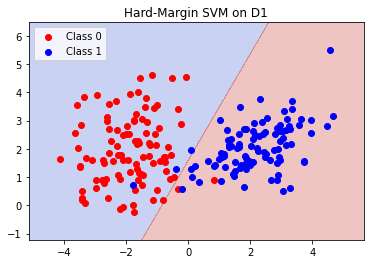

In [43]:
# Plot the decision boundary for Hard-Margin SVM on D1
plot_decision_boundary(svm_hard, X1, y1, "Hard-Margin SVM on D1")


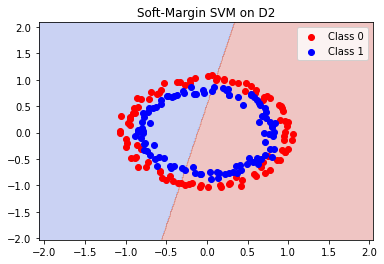

In [44]:
# Plot the decision boundary for Soft-Margin SVM on D2
plot_decision_boundary(svm_soft, X2, y2, "Soft-Margin SVM on D2")


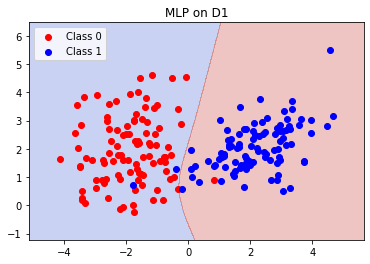

In [45]:
# Plot the decision boundary for MLP on D1
plot_decision_boundary(mlp_d1, X1, y1, "MLP on D1")


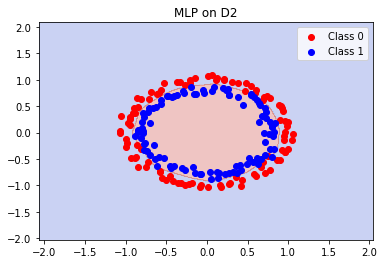

In [46]:
# Plot the decision boundary for MLP on D2
plot_decision_boundary(mlp_d2, X2, y2, "MLP on D2")
